In [1]:
import librosa
import numpy as np

In [6]:
# 두 개의 MP3 파일 경로 설정
mp3_file1 = "./data/audios/test1.mp3"
mp3_file2 = "./data/audios/test1_3_5s.mp3"

# librosa를 사용하여 MP3 파일 읽기
y1, sr1 = librosa.load(mp3_file1)
y2, sr2 = librosa.load(mp3_file2)

print('파일 읽기 완료')
print(y1.shape)
print(y1, sr1)
print(y2.shape)
print(y2, sr2)

파일 읽기 완료
(773735,)
[-1.2434498e-14  7.1054274e-15  7.1054274e-15 ...  1.3948970e-05
  2.3264314e-05  1.6807786e-05] 22050
(665856,)
[ 9.3132257e-09  1.1175871e-08 -7.4505806e-09 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 22050


cross correlation 계산 중...
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6468113e-13 4.0450746e-13
 1.5653470e-13]
(1439590,)
peak 찾는 중...
68506.75
774582


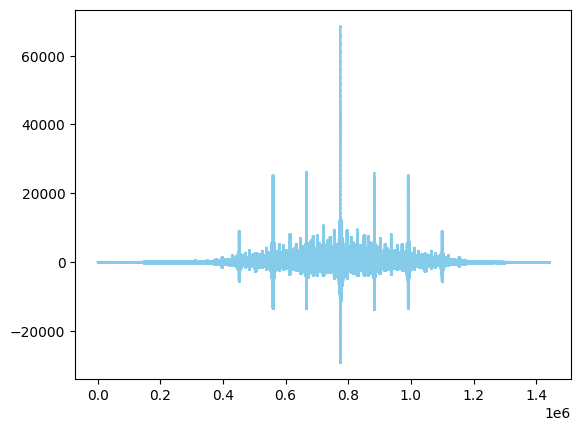

In [7]:
# cross-correlation 계산
print('cross correlation 계산 중...')
correlation = np.correlate(y1, y2, mode='full')
print(correlation)
print(correlation.shape)


# cross-correlation에서 peak 위치 찾기 (가장 큰 값의 인덱스)
print('peak 찾는 중...')
peak_index = np.argmax(correlation)
print(correlation[peak_index])
print(peak_index)

In [8]:
# sync 차이 계산 (peak 위치를 초 단위로 변환)
sync_difference_seconds = (peak_index - len(y2) + 1) / sr1
print(f"두 MP3 파일의 sync 차이는 약 {sync_difference_seconds:.2f} 초입니다.")

sync 차이 계산 중...
두 MP3 파일의 sync 차이는 약 4.93 초입니다.
